# Reddit Chatbot

## 🌐 What is Reddit?

**Reddit** is a social media platform composed of thousands of communities called **subreddits** (such as `/r/technology` or `/r/books`). Users can submit content, comment on posts, and express their opinions through upvotes 👍 or downvotes 👎.

Often referred to as **"The front page of the Internet,"** Reddit is a hub for trending topics, discussions, memes, and niche interests.

🧠 Imagine it as a massive group chat divided into rooms based on different themes and hobbies.

<div align="center">
  <img src="https://companieslogo.com/img/orig/RDDT-696a15f4.png?t=1708681761" alt="Reddit Logo" width="150"/>
</div>

---

## 🤖 What is a Reddit Chatbot?

A **Reddit chatbot** is a script or program that interacts with Reddit users and posts through automation. It can:

- 📬 Automatically reply to comments or posts  
- 🔍 Search for posts using keywords  
- 🎯 Monitor specific subreddits and trigger alerts  
- 💬 Engage in conversations for fun or utility  

The bot communicates with Reddit using its **API (Application Programming Interface)**—a tool that allows software to "talk" with Reddit just like a user would.

---

## 🔗 How Does It Connect to Reddit Using an API?

### ✨ Simple Steps with Emojis:

1. **🎟️ Get Access Credentials:**
   - Developers must register their app at Reddit's [developer portal](https://www.reddit.com/prefs/apps).
   - Upon registration, Reddit provides a `client_id`, `client_secret`, and `user_agent`.

2. **🔐 Authenticate the Bot:**
   - These credentials are used to log in and authorize the bot to act on Reddit using libraries like `PRAW`.

   ```python
   import praw
   reddit = praw.Reddit(client_id='your_id',
                        client_secret='your_secret',
                        user_agent='your_app_name')
   ```

3. **👀 Read Subreddit Posts:**
   - The bot can access and read posts from specific subreddits.

   ```python
   for post in reddit.subreddit("technology").hot(limit=5):
       print(post.title)
   ```

4. **🗣️ Post a Reply:**
   - It can even respond to posts or comments.

   ```python
   post.reply("Hello Reddit! 🤖")
   ```

5. **🔁 Run Continuously:**
   - The bot can be programmed to run continuously to respond in real-time or monitor events.

---

## 🛠️ Useful Tools for Reddit Bots

- 🔧 **`PRAW`** – Python Reddit API Wrapper (great for beginners)  
- 🔄 **`asyncpraw`** – Asynchronous version for better performance  
- 🔐 **`OAuth2`** – Ensures secure authorization and access control  

### Importing Required Libraries

In [3]:
# Importing Python Reddit API wrapper
import praw

# Importing Yahoo Finance for stock data
import yfinance as yf

# For adding delays between API requests
import time

# For reading and writing CSV files
import csv

# For accessing the IPython environment
from IPython import get_ipython

# For displaying outputs in notebooks
from IPython.display import display

# For data manipulation and analysis
import pandas as pd

# For handling warning messages
import warnings

# For data visualization
import seaborn as sns

# For plotting graphs and charts
import matplotlib.pyplot as plt

### Reddit API Credentials and Authentication

In [4]:
# Reddit API credentials
client_id = "your_client_id"           # Unique ID for the Reddit app
client_secret = "your_client_secret"   # Secret key for authentication
user_agent = "your_user_agent"         # Describes the app accessing Reddit
username = "your_username"             # Reddit account username
password = "your_password"             # Reddit account password

# Initialize Reddit instance
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,
    username=username,
    password=password
)

### Verifying Authentication

In [1]:
# Verify authentication
try:
    print("Authenticated as:", "Username")
except Exception as e:
    print("Authentication failed:", e)
    exit()

Authenticated as: Username


### Connecting To Subreddit

In [20]:
# Subreddit to monitor
subreddit = reddit.subreddit("stocks")  # subreddit

# Keywords to look for
keywords = [
    "$AAPL", "$GOOGL", "$GOOG", "$TSLA", "$AMZN", "$MSFT", "$NVDA", "$META", "$AMD", "$INTC",
    "$NFLX", "$PYPL", "$ADBE", "$CRM", "$IBM", "$ORCL", "$CSCO", "$QCOM", "$TXN", "$AVGO",
    "$SPY", "$QQQ", "$VOO", "$VTI", "$ARKK", "$GME", "$AMC", "$BB", "$NOK", "$PLTR",
    "$DIS", "$BA", "$CAT", "$XOM", "$CVX", "$WMT", "$COST", "$TGT", "$HD", "$LOW",
    "$JNJ", "$PFE", "$MRNA", "$BNTX", "$UNH", "$ABBV", "$TMO", "$DHR", "$LLY", "$NKE",
    "$SBUX", "$MCD", "$KO", "$PEP", "$WFC", "$JPM", "$BAC", "$C", "$GS", "$MS",
    "$V", "$MA", "$PYPL", "$SQ", "$SHOP", "$ZM", "$DOCU", "$ROKU", "$SPOT", "$SNOW",
    "$DASH", "$UBER", "$LYFT", "$F", "$GM", "$RIVN", "$LCID", "$NIO", "$XPEV", "$LI",
    "$BABA", "$JD", "$PDD", "$TCEHY", "$BIDU", "$NTES", "$SNAP", "$TWTR", "$PINS", "$RBLX"
]

### Fetching Price using yfinance

In [23]:
# Define function to fetch the latest stock price
def get_stock_price(ticker):
    """Fetch the current stock price using yfinance."""
    try:
        # Create a Ticker object for the given stock symbol
        stock = yf.Ticker(ticker)
        
        # Fetch the stock's 1-day trading history (latest data)
        price_data = stock.history(period="1d")
        
        # Get the closing price of the most recent trading day
        latest_price = price_data['Close'].iloc[-1]
        
        # Return the extracted price
        return latest_price

    except Exception as e:
        # Handle any errors (e.g., invalid ticker, network issues)
        print(f"Error fetching price for {ticker}: {e}")
        return None

# 🔎 Example usage
ticker_symbol = "AAPL"  # We can change this to any stock symbol
current_price = get_stock_price(ticker_symbol)

# 🖨️ Print the result
if current_price:
    print(f"📈 The latest closing price of {ticker_symbol} is ${current_price:.2f}")
else:
    print("❌ Could not fetch stock price.")

📈 The latest closing price of AAPL is $172.42


### Function to Monitor Subreddit

In [27]:
# Define a function to monitor subreddit comments and reply with stock prices
def reply_to_comments():
    """Monitor comments and reply with stock prices."""
    
    print("🤖 Bot is running. Monitoring comments...")

    # Record the time when the bot starts
    start_time = time.time()

    # Set the duration for which the bot will run (10 minutes)
    time_limit = 600  # 10 minutes in seconds

    # Loop runs while the total time is less than the limit
    while time.time() - start_time < time_limit:

        # Fetch the 10 most recent comments from the subreddit
        for comment in subreddit.comments(limit=10):  
            # Log part of the comment being checked
            print(f"📝 Checking comment: {comment.body[:50]}...")  

            # Check if any keyword (like "$AAPL") is mentioned in the comment
            for keyword in keywords:
                if keyword in comment.body:
                    print(f"✅ Keyword {keyword} found in comment.")

                    # Remove the "$" to get the stock ticker (e.g., "AAPL")
                    ticker = keyword[1:]

                    # Get the current stock price
                    price = get_stock_price(ticker)

                    # If price is fetched successfully, prepare a reply
                    if price:
                        reply_text = f"The current price of {ticker} is **${price:.2f}**."

                        # Try replying to the comment
                        try:
                            comment.reply(reply_text)
                            print(f"💬 Replied to comment with {ticker} price: ${price:.2f}")
                        except Exception as e:
                            print(f"❌ Error replying to comment: {e}")
                    else:
                        print(f"⚠️ Could not fetch price for {ticker}.")

        # Wait for 30 seconds before checking comments again (to avoid spamming)
        time.sleep(30)

    print("🛑 Bot has stopped running.")

### Define Function for Manual Testing

In [32]:
# Define a function to manually test bot logic without replying
def manual_test():
    """Manually test the bot by fetching the latest comments."""

    print("🔍 Running manual test...")

    # Loop through the 10 most recent comments in the subreddit
    for comment in subreddit.comments(limit=10):  
        # Print a preview of the comment (first 100 characters)
        print(f"📝 Comment: {comment.body[:100]}...")  

        # Check each keyword (e.g., "$AAPL") in the comment
        for keyword in keywords:
            if keyword in comment.body:
                print(f"✅ Keyword {keyword} found in comment.")

                # Extract stock ticker by removing the "$" symbol (e.g., from "$AAPL" to "AAPL")
                ticker = keyword[1:]  

                # Fetch the stock price using the function
                price = get_stock_price(ticker)

                # If price was successfully retrieved, print it
                if price:
                    print(f"📈 The current price of {ticker} is ${price:.2f}.")
                else:
                    # If the stock price couldn't be fetched
                    print(f"⚠️ Could not fetch price for {ticker}.")

### Running the Bot and Fetching Data

In [63]:
# Ask the user if they want to run the bot or do a manual test
choice = input("Do you want to run the bot (b) or manually test (m)? ").strip().lower()

# If user chooses to run the bot
if choice == "b":
    reply_to_comments()  # Run the bot which monitors and replies to comments

# If user chooses manual test
elif choice == "m":
    manual_test()  # Run manual test (only prints)

    # Extra: Save the latest comments to a CSV file
    print("💾 Saving fetched comments to 'manual_test_output.csv'...")

    # Create a list to store comments
    comment_list = []

    # Loop through 150 most recent comments again to collect them
    for comment in subreddit.comments(limit=600):
        comment_list.append({"Comment": comment.body})  # Save each comment in dictionary format

    # Convert list to a DataFrame
    df = pd.DataFrame(comment_list)

    # Save DataFrame to CSV file
    df.to_csv("Reddit_Stock_Comments.csv", index=False)

    print("✅ Comments saved successfully.")

# If user enters an invalid option
else:
    print("❌ Invalid choice. Exiting.")

Do you want to run the bot (b) or manually test (m)?  m


🔍 Running manual test...
📝 Comment: Sell off us treasury bonds held by China, do an export ban on key rare earth materials to the usa, b...
📝 Comment: Make no mistake about it Trump will use this ordeal with China (which he intentionally started) as a...
📝 Comment: You’re making the case that Americans should be taking advantage of slave labor wages in other count...
📝 Comment: Yeah that's the thing, but what happens to us along the way. Markets can't continue trading the way ...
📝 Comment: Maybe genociding part of their population? Or is that OK even though it has cost more lives? The US ...
📝 Comment: Which is strange because they already where that in his first turn. They are just much more illegal ...
📝 Comment: Doesn’t work that way. Bond ETFs may behave this way....
📝 Comment: This statement can actually get you to qualify for medical insanity benefits...
📝 Comment: intelligence isn’t spelled leverage...
📝 Comment: Mariana Trench...
💾 Saving fetched comments to 'manual_test_outpu

### Now we have find and saved all comments relevant to stock so now we will clean the data and take some insights form it

In [65]:
import pandas as pd
import re
import os

# 📥 Step 1: Read the CSV file
df = pd.read_csv("Reddit_Stock_Comments.csv")

# 📊 Step 2: Show original stats
print("📄 Original DataFrame Info:")
print(f"- Rows: {df.shape[0]}")
print(f"- Columns: {df.shape[1]}")
file_size = os.path.getsize("Reddit_Stock_Comments.csv") / 1024  # in KB
print(f"- File Size: {file_size:.2f} KB")

# 🧹 Step 3: Clean the comments column (remove non-alphabet characters)
def clean_text(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^A-Za-z\s]', '', str(text))

df["Comment"] = df["Comment"].apply(clean_text)

# 🧪 Optional: Show some cleaned comments
print("\n🧾 Sample Cleaned Comments:")
print(df["Comment"].head())

# 💾 Step 4: Save to new cleaned CSV
df.to_csv("Cleaned_Reddit_Stock_Comments.csv", index=False)
print("\n✅ Cleaned data saved to 'Cleaned_Reddit_Stock_Comments.csv'")

📄 Original DataFrame Info:
- Rows: 600
- Columns: 1
- File Size: 129.18 KB

🧾 Sample Cleaned Comments:
0    Sell off us treasury bonds held by China do an...
1    Make no mistake about it Trump will use this o...
2    Youre making the case that Americans should be...
3    Yeah thats the thing but what happens to us al...
4    Maybe genociding part of their population Or i...
Name: Comment, dtype: object

✅ Cleaned data saved to 'Cleaned_Reddit_Stock_Comments.csv'


### Generating and Plotting Sentiment Scores

✅ Cleaned CSV updated with Sentiment, WordCount, and Company columns.


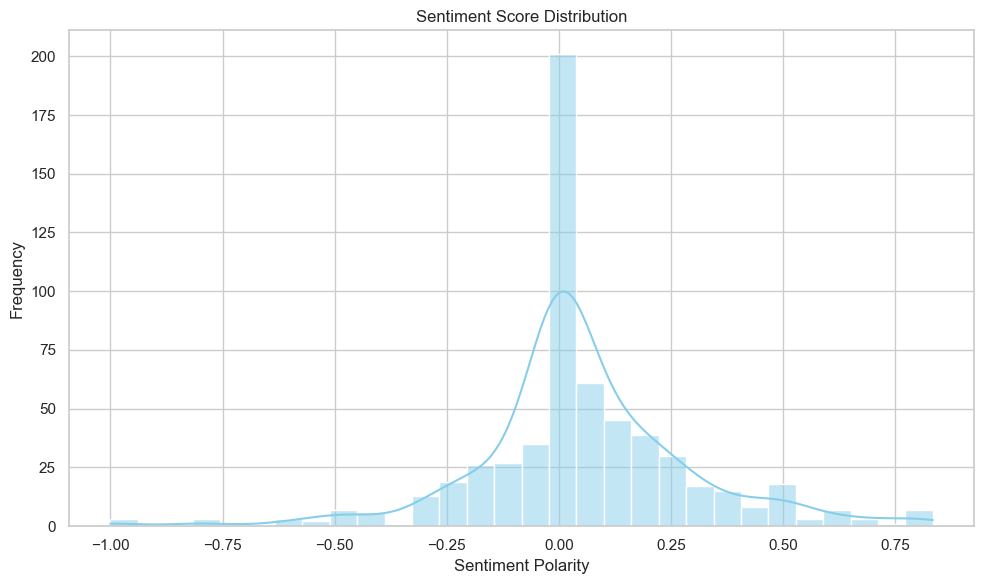

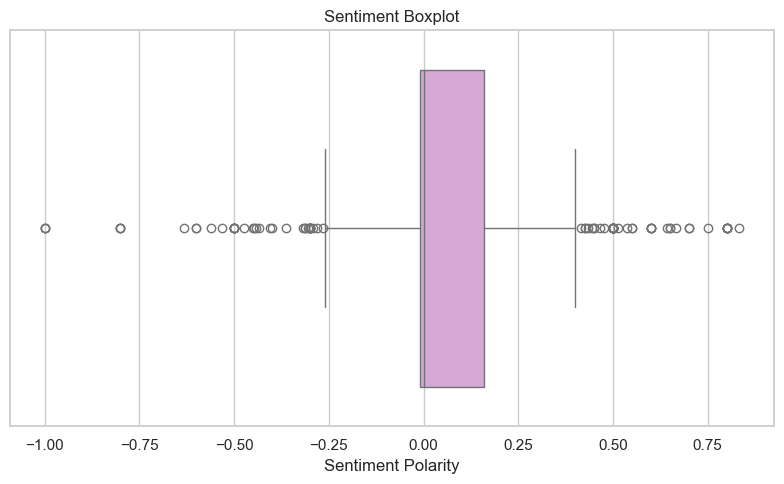

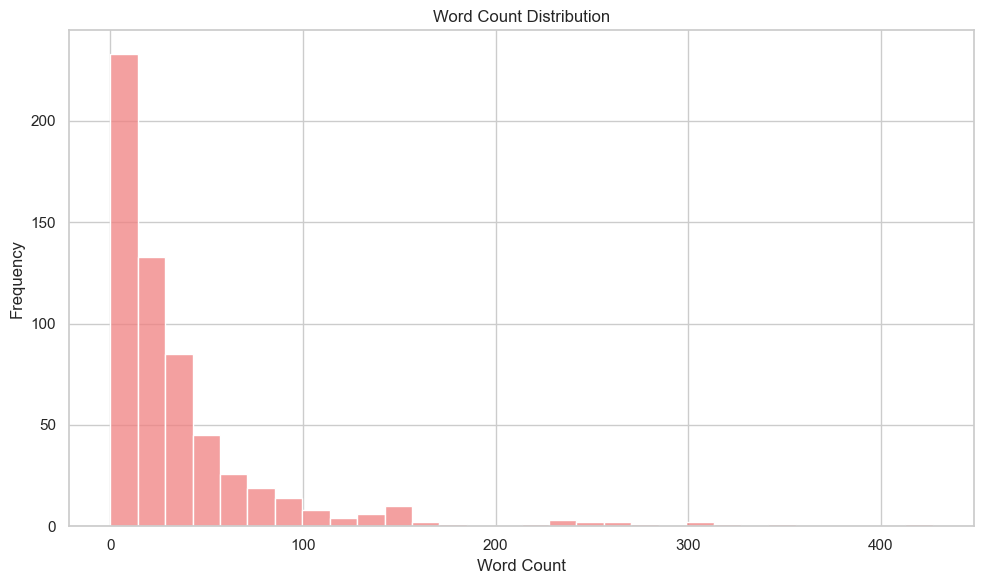

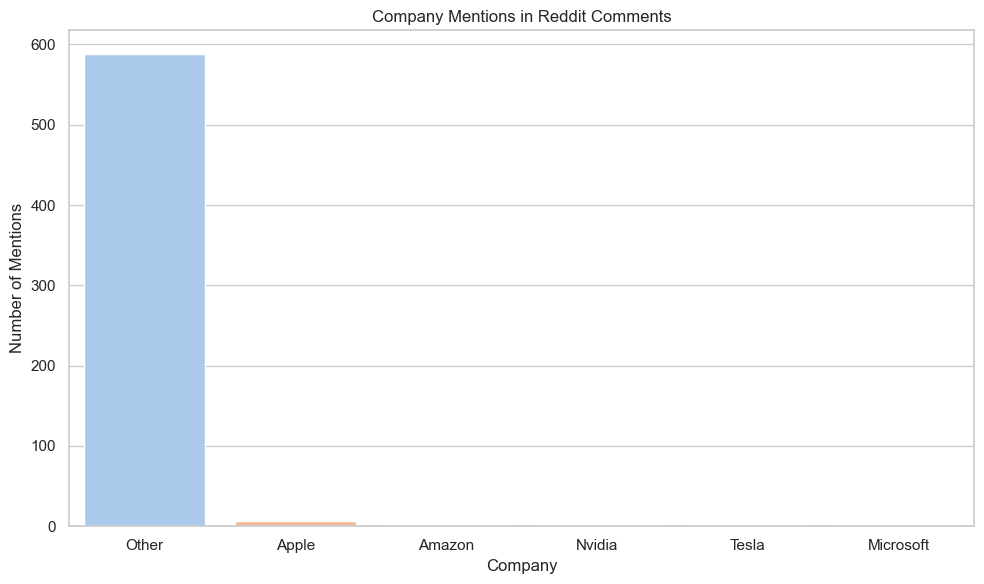

✅ All plots saved (with background & transparent) and shown interactively.


In [69]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import warnings
import re

# 📦 Ignore warnings
warnings.filterwarnings("ignore")

# 🎨 Seaborn pastel theme
sns.set(style="whitegrid", palette="pastel")

# 📁 Ensure Plots directory exists
os.makedirs("Plots", exist_ok=True)

# 📥 Read cleaned CSV
df = pd.read_csv("Cleaned_Reddit_Stock_Comments.csv")

# 🧠 Sentiment Analysis Function
def get_sentiment(text):
    text = str(text) if pd.notnull(text) else ""
    return TextBlob(text).sentiment.polarity

# 🔤 Word Count Function
def get_word_count(text):
    text = str(text) if pd.notnull(text) else ""
    return len(text.split())

# 🏢 Company Extraction Function
def extract_company(text, companies):
    text = str(text) if pd.notnull(text) else ""
    for company in companies:
        if re.search(rf'\b{company}\b', text, re.IGNORECASE):
            return company
    return "Other"

# 💾 Save plot with and without transparency
def save_plot(fig, title):
    filename = title.replace(" ", "_")
    fig.savefig(f"Plots/{filename}.png", transparent=False)
    fig.savefig(f"Plots/{filename}_transparent.png", transparent=True)

# 🧾 Add Sentiment and WordCount columns
df["Sentiment"] = df["Comment"].apply(get_sentiment)
df["WordCount"] = df["Comment"].apply(get_word_count)

# 🏢 Define companies to track
tracked_companies = ["Tesla", "Google", "Apple", "Microsoft", "Amazon", "Meta", "Nvidia"]
df["Company"] = df["Comment"].apply(lambda x: extract_company(x, tracked_companies))

# 💾 Save updated CSV
df.to_csv("Cleaned_Reddit_Stock_Comments.csv", index=False)
print("✅ Cleaned CSV updated with Sentiment, WordCount, and Company columns.")

# 📊 Plot 1: Sentiment Distribution
fig1 = plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment"], bins=30, kde=True, color="skyblue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.tight_layout()
save_plot(fig1, "Sentiment Score Distribution")
plt.show()

# 📊 Plot 2: Sentiment Boxplot
fig2 = plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sentiment"], color="plum")
plt.title("Sentiment Boxplot")
plt.xlabel("Sentiment Polarity")
plt.tight_layout()
save_plot(fig2, "Sentiment Boxplot")
plt.show()

# 📊 Plot 3: Word Count Distribution
fig3 = plt.figure(figsize=(10, 6))
sns.histplot(df["WordCount"], bins=30, color="lightcoral")
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
save_plot(fig3, "Word Count Distribution")
plt.show()

# 📊 Plot 4: Company Mentions Count
fig4 = plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Company", order=df["Company"].value_counts().index, palette="pastel")
plt.title("Company Mentions in Reddit Comments")
plt.xlabel("Company")
plt.ylabel("Number of Mentions")
plt.tight_layout()
save_plot(fig4, "Company Mentions in Reddit Comments")
plt.show()

print("✅ All plots saved (with background & transparent) and shown interactively.")

### Plotting WordCloud

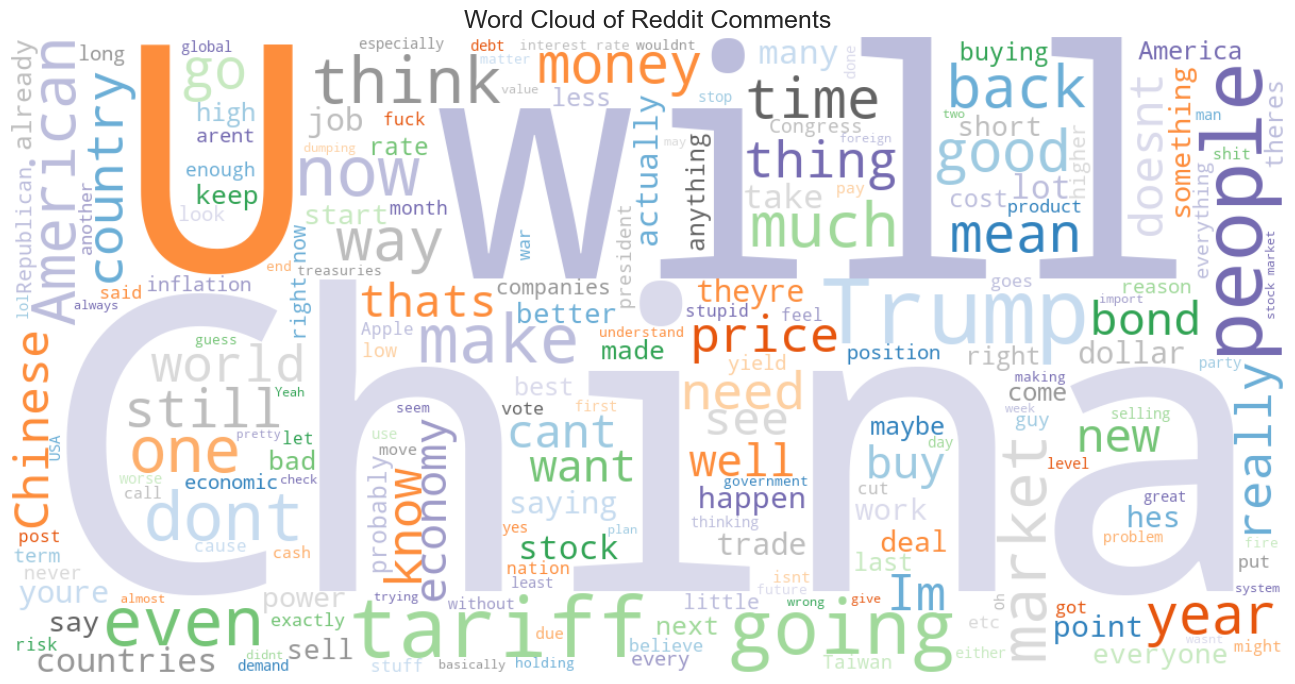

In [71]:
from wordcloud import WordCloud

# 🌥️ Word Cloud Plot Function
def plot_wordcloud(text_series, title):
    # Join all comments into a single string
    text = " ".join(text_series.dropna().astype(str))

    # Generate WordCloud object
    wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="tab20c").generate(text)

    # Plotting
    fig = plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.tight_layout()

    # Save both transparent and normal versions
    filename = title.replace(" ", "_")
    fig.savefig(f"Plots/{filename}.png", transparent=False)
    fig.savefig(f"Plots/{filename}_transparent.png", transparent=True)
    
    plt.show()
    plt.close(fig)

# Plotting Wordcloud
plot_wordcloud(df["Comment"], "Word Cloud of Reddit Comments")

### Plot pie charts of company and sentiment categories

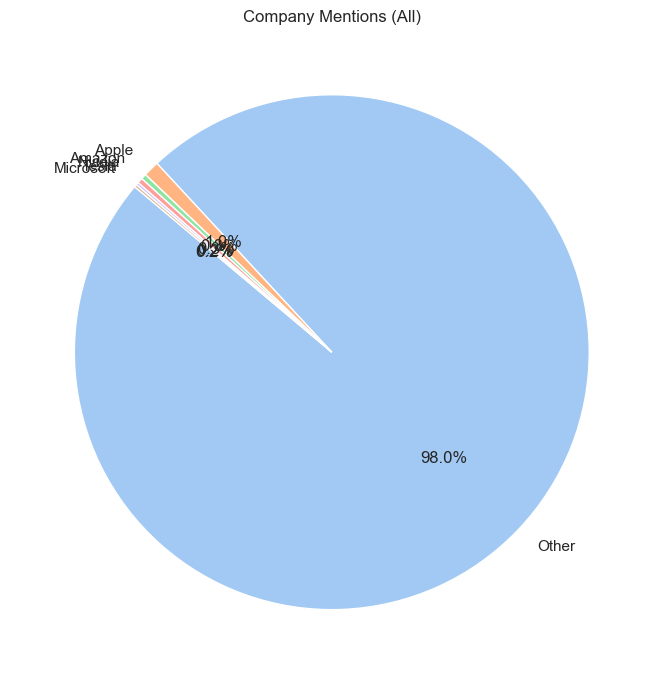

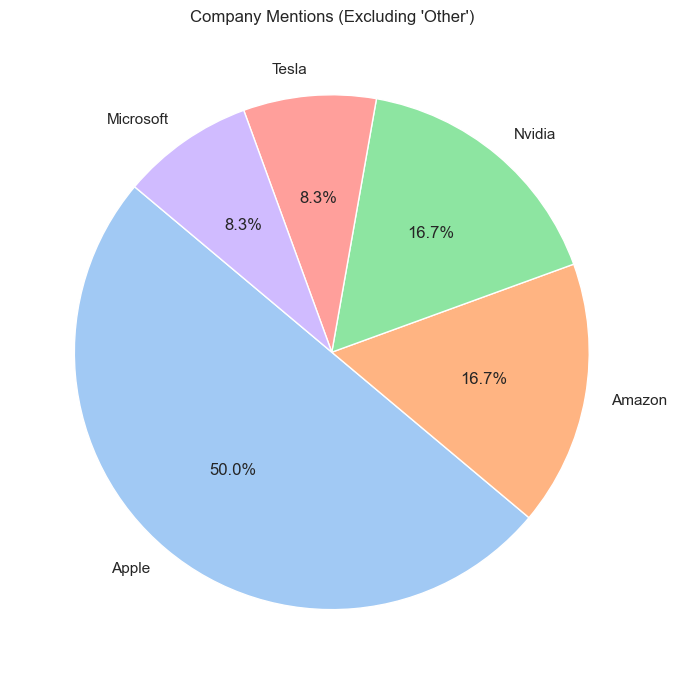

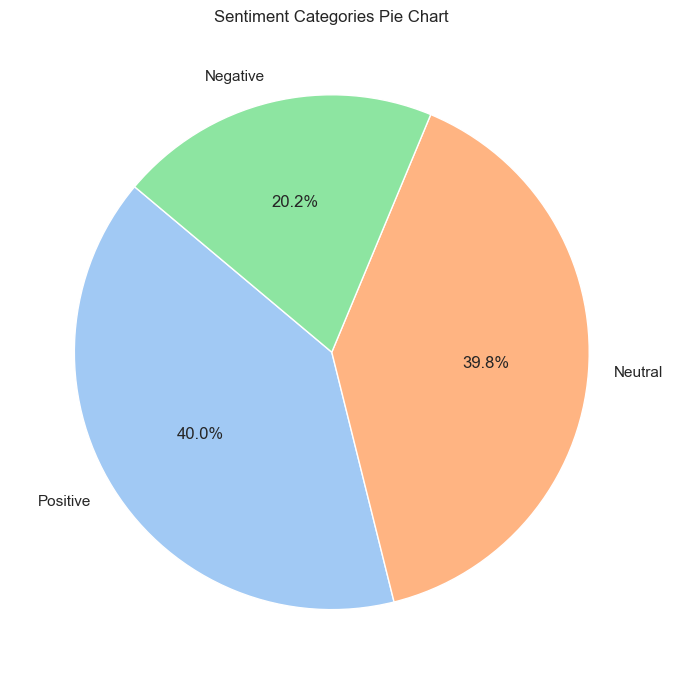

✅ All pie charts saved (with background & transparent) and shown interactively.


In [78]:
# 🥧 Function: Plot Pie Charts for Company Mentions & Sentiment Categories
def plot_pie_charts():
    # 💬 Categorize sentiment
    def categorize_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

    df["SentimentCategory"] = df["Sentiment"].apply(categorize_sentiment)

    # 📊 Company Mentions
    company_counts = df["Company"].value_counts()

    # First Pie: Full company mentions (including Other)
    fig5, ax1 = plt.subplots(figsize=(7, 7))
    ax1.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("pastel"))
    ax1.set_title("Company Mentions (All)")
    plt.tight_layout()
    save_plot(fig5, "Company Mentions (All)")
    plt.show()

    # Second Pie: Exclude "Other" if it's dominant
    if "Other" in company_counts and company_counts["Other"] / company_counts.sum() > 0.9:
        company_counts_no_other = company_counts.drop("Other")
        
        fig_extra, ax_extra = plt.subplots(figsize=(7, 7))
        ax_extra.pie(company_counts_no_other, labels=company_counts_no_other.index, autopct='%1.1f%%',
                     startangle=140, colors=sns.color_palette("pastel"))
        ax_extra.set_title("Company Mentions (Excluding 'Other')")
        plt.tight_layout()
        save_plot(fig_extra, "Company Mentions (Excluding Other)")
        plt.show()

    # 📊 Pie 2: Sentiment Categories
    sentiment_counts = df["SentimentCategory"].value_counts()

    fig6, ax2 = plt.subplots(figsize=(7, 7))
    ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("pastel"))
    ax2.set_title("Sentiment Categories Pie Chart")
    plt.tight_layout()
    save_plot(fig6, "Sentiment Categories Pie Chart")
    plt.show()

# 📈 Generate Pie Charts
plot_pie_charts()
print("✅ All pie charts saved (with background & transparent) and shown interactively.")
